In [ ]:
#Menghubungkan notebook ke google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import math
import os
sc = MinMaxScaler(feature_range=(0,1)) #normalisasi dari 0 - 1



#Percobaan dari Sumber

[Stack OverFlow](https://https://stackoverflow.com/questions/69906416/forecast-future-values-with-lstm-in-python)

[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 1s 773ms/step


<Axes: title={'center': 'AAPL'}, xlabel='Date'>

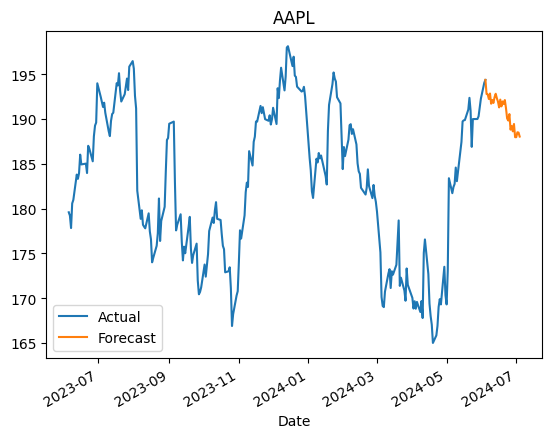

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None
tf.random.set_seed(0)

# download the data
df = yf.download(tickers=['AAPL'], period='1y')
y = df['Close'].fillna(method='ffill')
y = y.values.reshape(-1, 1)

# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)

# generate the input and output sequences
n_lookback = 60  # length of input sequences (lookback period)
n_forecast = 30  # length of output sequences (forecast period)

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

# fit the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=100, batch_size=32, verbose=0)

# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

# organize the results in a data frame
df_past = df[['Close']].reset_index()
df_past.rename(columns={'index': 'Date', 'Close': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past._append(df_future).set_index('Date')
# plot the results
results.plot(title='AAPL')


In [ ]:
df_past

,Date,Actual,Forecast
0,2023-06-05,179.580002,NaN
1,2023-06-06,179.210007,NaN
2,2023-06-07,177.820007,NaN
3,2023-06-08,180.570007,NaN
4,2023-06-09,180.960007,NaN
...,...,...,...
247,2024-05-29,190.289993,NaN
248,2024-05-30,191.289993,NaN
249,2024-05-31,192.250000,NaN
250,2024-06-03,194.029999,NaN


In [ ]:
df_future

,Date,Actual,Forecast
0,2024-06-05,NaN,193.951630
1,2024-06-06,NaN,194.441254
2,2024-06-07,NaN,193.546555
3,2024-06-08,NaN,193.070953
4,2024-06-09,NaN,192.128555
5,2024-06-10,NaN,193.079987
6,2024-06-11,NaN,192.807617
7,2024-06-12,NaN,192.625992
8,2024-06-13,NaN,191.785751
9,2024-06-14,NaN,192.276520


In [ ]:
# download the data
df = yf.download(tickers=['AAPL'], period='1y')
# y = df['Close'].fillna(method='ffill')
# y = y.values.reshape(-1, 1)

# # scale the data
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = scaler.fit(y)
# y = scaler.transform(y)

# # generate the input and output sequences
# n_lookback = 60  # length of input sequences (lookback period)
# n_forecast = 30  # length of output sequences (forecast period)

# X = []
# Y = []

# for i in range(n_lookback, len(y) - n_forecast + 1):
#     X.append(y[i - n_lookback: i])
#     Y.append(y[i: i + n_forecast])

# X = np.array(X)
# Y = np.array(Y)

# # fit the model
# model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
# model.add(LSTM(units=50))
# model.add(Dense(n_forecast))

# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(X, Y, epochs=100, batch_size=32, verbose=0)

# # generate the forecasts
# X_ = y[- n_lookback:]  # last available input sequence
# X_ = X_.reshape(1, n_lookback, 1)

# Y_ = model.predict(X_).reshape(-1, 1)
# Y_ = scaler.inverse_transform(Y_)

# # organize the results in a data frame
# df_past = df[['Close']].reset_index()
# df_past.rename(columns={'index': 'Date', 'Close': 'Actual'}, inplace=True)
# df_past['Date'] = pd.to_datetime(df_past['Date'])
# df_past['Forecast'] = np.nan
# df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

# df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
# df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
# df_future['Forecast'] = Y_.flatten()
# df_future['Actual'] = np.nan

# results = df_past._append(df_future).set_index('Date')
# # plot the results
# results.plot(title='AAPL')



[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-05,182.630005,184.949997,178.039993,179.580002,178.631332,121946500
2023-06-06,179.970001,180.119995,177.429993,179.210007,178.263306,64848400
2023-06-07,178.440002,181.210007,177.320007,177.820007,176.880630,61944600
2023-06-08,177.899994,180.839996,177.460007,180.570007,179.616104,50214900
2023-06-09,181.500000,182.229996,180.630005,180.960007,180.004059,48870700


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-29,189.610001,192.250000,189.509995,190.289993,190.289993,53068000
2024-05-30,190.759995,192.179993,190.630005,191.289993,191.289993,49947900
2024-05-31,191.440002,192.570007,189.910004,192.250000,192.250000,75158300
2024-06-03,192.899994,194.990005,192.520004,194.029999,194.029999,50080500
2024-06-04,194.720001,195.320007,193.034195,194.350006,194.350006,45319734


In [ ]:
y = df['Close'].fillna(method='ffill')

In [ ]:
y.head()

Date
2023-06-05    179.580002
2023-06-06    179.210007
2023-06-07    177.820007
2023-06-08    180.570007
2023-06-09    180.960007
Name: Close, dtype: float64

In [ ]:
y = y.values.reshape(-1, 1)


In [ ]:
y

array([[179.58000183],
       [179.21000671],
       [177.82000732],
       [180.57000732],
       [180.96000671],
       [183.78999329],
       [183.30999756],
       [183.94999695],
       [186.00999451],
       [184.91999817],
       [185.00999451],
       [183.96000671],
       [187.        ],
       [186.67999268],
       [185.27000427],
       [188.05999756],
       [189.25      ],
       [189.58999634],
       [193.97000122],
       [192.46000671],
       [191.33000183],
       [191.80999756],
       [190.67999268],
       [188.61000061],
       [188.08000183],
       [189.77000427],
       [190.53999329],
       [190.69000244],
       [193.99000549],
       [193.72999573],
       [195.1000061 ],
       [193.13000488],
       [191.94000244],
       [192.75      ],
       [193.61999512],
       [194.5       ],
       [193.22000122],
       [195.83000183],
       [196.44999695],
       [195.61000061],
       [192.58000183],
       [191.16999817],
       [181.99000549],
       [178

In [ ]:
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)

In [ ]:
y

array([[0.44035039],
       [0.42917567],
       [0.38719442],
       [0.47025089],
       [0.48202979],
       [0.56750205],
       [0.55300505],
       [0.57233454],
       [0.63455132],
       [0.60163086],
       [0.60434896],
       [0.57263686],
       [0.66445181],
       [0.65478684],
       [0.61220187],
       [0.69646624],
       [0.73240711],
       [0.7426758 ],
       [0.87496227],
       [0.82935688],
       [0.79522807],
       [0.80972507],
       [0.77559626],
       [0.71307763],
       [0.69707041],
       [0.74811247],
       [0.77136795],
       [0.77589858],
       [0.87556644],
       [0.86771354],
       [0.90909108],
       [0.8495924 ],
       [0.81365152],
       [0.83811536],
       [0.86439126],
       [0.89096948],
       [0.8523105 ],
       [0.93113867],
       [0.94986398],
       [0.92449411],
       [0.83298101],
       [0.79039558],
       [0.51313818],
       [0.4183028 ],
       [0.44699495],
       [0.39836914],
       [0.39172458],
       [0.386

In [ ]:
# generate the input and output sequences
n_lookback = 60  # length of input sequences (lookback period)
n_forecast = 30  # length of output sequences (forecast period)

In [ ]:
X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])



In [ ]:
X

[array([[0.44035039],
        [0.42917567],
        [0.38719442],
        [0.47025089],
        [0.48202979],
        [0.56750205],
        [0.55300505],
        [0.57233454],
        [0.63455132],
        [0.60163086],
        [0.60434896],
        [0.57263686],
        [0.66445181],
        [0.65478684],
        [0.61220187],
        [0.69646624],
        [0.73240711],
        [0.7426758 ],
        [0.87496227],
        [0.82935688],
        [0.79522807],
        [0.80972507],
        [0.77559626],
        [0.71307763],
        [0.69707041],
        [0.74811247],
        [0.77136795],
        [0.77589858],
        [0.87556644],
        [0.86771354],
        [0.90909108],
        [0.8495924 ],
        [0.81365152],
        [0.83811536],
        [0.86439126],
        [0.89096948],
        [0.8523105 ],
        [0.93113867],
        [0.94986398],
        [0.92449411],
        [0.83298101],
        [0.79039558],
        [0.51313818],
        [0.4183028 ],
        [0.44699495],
        [0

In [ ]:
Y

[array([[0.68408316],
        [0.69072772],
        [0.73874981],
        [0.74599808],
        [0.54092429],
        [0.37934151],
        [0.39806682],
        [0.43370584],
        [0.34128671],
        [0.27816389],
        [0.32437346],
        [0.30232541],
        [0.39172458],
        [0.42494736],
        [0.31682287],
        [0.26970681],
        [0.29568085],
        [0.33464215],
        [0.2102086 ],
        [0.16399857],
        [0.17185147],
        [0.18755683],
        [0.26427061],
        [0.22349724],
        [0.26155251],
        [0.29930545],
        [0.37722758],
        [0.42253112],
        [0.40440952],
        [0.44699495]]),
 array([[0.69072772],
        [0.73874981],
        [0.74599808],
        [0.54092429],
        [0.37934151],
        [0.39806682],
        [0.43370584],
        [0.34128671],
        [0.27816389],
        [0.32437346],
        [0.30232541],
        [0.39172458],
        [0.42494736],
        [0.31682287],
        [0.26970681],
        

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
X.shape

(163, 60, 1)

In [ ]:
Y.shape

(163, 30, 1)

In [ ]:
# fit the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=100, batch_size=32, verbose=0)

In [ ]:
history = model.fit(X, Y, epochs=100, batch_size=32, verbose=0)

In [ ]:
# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

1/1 [==============================] - 1s 1s/step


# Pengolahan df_past

In [ ]:
# organize the results in a data frame
df_past = df[['Close']].reset_index()




In [ ]:
df_past.rename(columns={'index': 'Date', 'Close': 'Actual'}, inplace=True)


In [ ]:
df_past

,Date,Actual
0,2023-06-05,179.580002
1,2023-06-06,179.210007
2,2023-06-07,177.820007
3,2023-06-08,180.570007
4,2023-06-09,180.960007
...,...,...
247,2024-05-29,190.289993
248,2024-05-30,191.289993
249,2024-05-31,192.250000
250,2024-06-03,194.029999


In [ ]:
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan


In [ ]:
df_past

,Date,Actual,Forecast
0,2023-06-05,179.580002,NaN
1,2023-06-06,179.210007,NaN
2,2023-06-07,177.820007,NaN
3,2023-06-08,180.570007,NaN
4,2023-06-09,180.960007,NaN
...,...,...,...
247,2024-05-29,190.289993,NaN
248,2024-05-30,191.289993,NaN
249,2024-05-31,192.250000,NaN
250,2024-06-03,194.029999,NaN


In [ ]:
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

In [ ]:
df_past

,Date,Actual,Forecast
0,2023-06-05,179.580002,NaN
1,2023-06-06,179.210007,NaN
2,2023-06-07,177.820007,NaN
3,2023-06-08,180.570007,NaN
4,2023-06-09,180.960007,NaN
...,...,...,...
247,2024-05-29,190.289993,NaN
248,2024-05-30,191.289993,NaN
249,2024-05-31,192.250000,NaN
250,2024-06-03,194.029999,NaN


#Pengolahan df_future

In [ ]:
df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])


In [ ]:
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)


In [ ]:
df_future

,Date,Actual,Forecast
0,2024-06-05,NaN,NaN
1,2024-06-06,NaN,NaN
2,2024-06-07,NaN,NaN
3,2024-06-08,NaN,NaN
4,2024-06-09,NaN,NaN
5,2024-06-10,NaN,NaN
6,2024-06-11,NaN,NaN
7,2024-06-12,NaN,NaN
8,2024-06-13,NaN,NaN
9,2024-06-14,NaN,NaN


In [ ]:
df_future['Forecast'] = Y_.flatten()


In [ ]:
df_future.head()

,Date,Actual,Forecast
0,2024-06-05,NaN,193.803497
1,2024-06-06,NaN,193.879578
2,2024-06-07,NaN,194.691986
3,2024-06-08,NaN,194.216751
4,2024-06-09,NaN,194.504135


In [ ]:
df_future['Actual'] = np.nan



In [ ]:
df_future.head()

,Date,Actual,Forecast
0,2024-06-05,NaN,193.803497
1,2024-06-06,NaN,193.879578
2,2024-06-07,NaN,194.691986
3,2024-06-08,NaN,194.216751
4,2024-06-09,NaN,194.504135


In [ ]:
results = df_past._append(df_future).set_index('Date')


In [ ]:
results

,Actual,Forecast
Date,,
2023-06-05,179.580002,NaN
2023-06-06,179.210007,NaN
2023-06-07,177.820007,NaN
2023-06-08,180.570007,NaN
2023-06-09,180.960007,NaN
...,...,...
2024-06-30,NaN,183.583084
2024-07-01,NaN,185.467682
2024-07-02,NaN,185.426468


<Axes: title={'center': 'AAPL'}, xlabel='Date'>

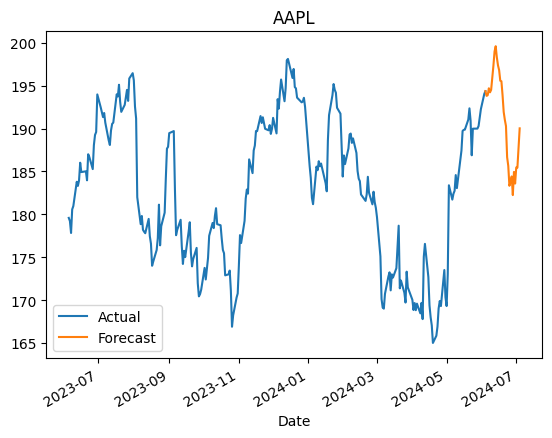

In [ ]:
# plot the results
results.plot(title='AAPL')

# Coba Pakai Future yang Berbeda

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None
tf.random.set_seed(0)

# download the data
df = yf.download(tickers=['AAPL'], period='1y')
y = df['Close'].fillna(method='ffill')
y = y.values.reshape(-1, 1)

# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
y

array([[0.44035039],
       [0.42917567],
       [0.38719442],
       [0.47025089],
       [0.48202979],
       [0.56750205],
       [0.55300505],
       [0.57233454],
       [0.63455132],
       [0.60163086],
       [0.60434896],
       [0.57263686],
       [0.66445181],
       [0.65478684],
       [0.61220187],
       [0.69646624],
       [0.73240711],
       [0.7426758 ],
       [0.87496227],
       [0.82935688],
       [0.79522807],
       [0.80972507],
       [0.77559626],
       [0.71307763],
       [0.69707041],
       [0.74811247],
       [0.77136795],
       [0.77589858],
       [0.87556644],
       [0.86771354],
       [0.90909108],
       [0.8495924 ],
       [0.81365152],
       [0.83811536],
       [0.86439126],
       [0.89096948],
       [0.8523105 ],
       [0.93113867],
       [0.94986398],
       [0.92449411],
       [0.83298101],
       [0.79039558],
       [0.51313818],
       [0.4183028 ],
       [0.44699495],
       [0.39836914],
       [0.39172458],
       [0.386

[*********************100%%**********************]  1 of 1 completed


Epoch 1/100
6/6 [==============================] - 4s 47ms/step - loss: 0.2695
Epoch 2/100
6/6 [==============================] - 0s 47ms/step - loss: 0.1482
Epoch 3/100
6/6 [==============================] - 0s 46ms/step - loss: 0.1025
Epoch 4/100
6/6 [==============================] - 0s 46ms/step - loss: 0.0803
Epoch 5/100
6/6 [==============================] - 0s 60ms/step - loss: 0.0746
Epoch 6/100
6/6 [==============================] - 0s 74ms/step - loss: 0.0723
Epoch 7/100
6/6 [==============================] - 0s 75ms/step - loss: 0.0691
Epoch 8/100
6/6 [==============================] - 0s 70ms/step - loss: 0.0675
Epoch 9/100
6/6 [==============================] - 0s 76ms/step - loss: 0.0658
Epoch 10/100
6/6 [==============================] - 0s 75ms/step - loss: 0.0675
Epoch 11/100
6/6 [==============================] - 0s 72ms/step - loss: 0.0647
Epoch 12/100
6/6 [==============================] - 0s 77ms/step - loss: 0.0604
Epoch 13/100
6/6 [==============================]

<Axes: title={'center': 'AAPL'}, xlabel='Date'>

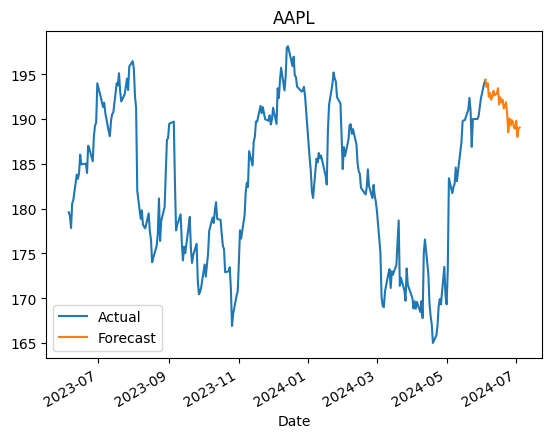

In [ ]:
# generate the input and output sequences
n_lookback = 60  # length of input sequences (lookback period)
n_forecast = 30  # length of output sequences (forecast period)

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

# fit the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=100, batch_size=32, verbose=1)

# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

# organize the results in a data frame
df_past = df[['Close']].reset_index()
df_past.rename(columns={'index': 'Date', 'Close': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past._append(df_future).set_index('Date')
# plot the results
results.plot(title='AAPL')


# Pakai data Sendiri

In [ ]:
#Menghubungkan notebook ke google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
path_dir = "/content/drive/MyDrive/TA2/DataHasilOlah"
list_file = os.listdir(path_dir)
list_file

['data2201-2402_10stock.csv',
 'data2201-2402_10stock_date_repair.csv',
 'ASII2201-2402.csv',
 'BBNI2201-2402.csv',
 'BBRI2201-2402.csv',
 'BBCA2201-2402.csv',
 'ADRO2201-2402.csv',
 'PGAS2201-2402.csv',
 'SMGR2201-2402.csv',
 'BMRI2201-2402.csv',
 'UNTR2201-2402.csv',
 'UNVR2201-2402.csv',
 'data2201-2404_10stock.csv',
 'data2201-2404_10stock_date_repair.csv',
 'ADRO2201-2404.csv',
 'PGAS2201-2404.csv',
 'SMGR2201-2404.csv',
 'BBCA2201-2404.csv',
 'BBRI2201-2404.csv',
 'BMRI2201-2404.csv',
 'BBNI2201-2404.csv',
 'data2201-2404_10stock_new.csv',
 'data2201-2404_10stock_date_repair_new.csv',
 'AMRT2201-2404.csv',
 'MAPI2201-2404.csv',
 'INKP2201-2404.csv',
 'INTP2201-2404.csv',
 'ACES2201-2404.csv',
 'SIDO2201-2404.csv',
 'HRUM2201-2404.csv',
 'ASII2201-2404.csv',
 'UNVR2201-2404.csv',
 'UNTR2201-2404.csv']

In [ ]:
asii_data = path_dir+"/"+list_file[31]

#Method

In [ ]:
def data_clean(path_data):
  df = pd.read_csv(path_data)
  df = df.drop('Unnamed: 0', axis=1)
  df = df.sort_values('date', ascending=True)
  df.set_index('date', inplace=True)
  return df

In [ ]:
def view_data(df, nama):
  #Menampilkan data close price
  plt.figure(figsize=(16,8))
  sns.lineplot(x=df.index, y=df['close'])
  plt.xlabel('Tanggal', fontsize=20)
  plt.ylabel('Harga Penutupan dalam Rupiah (Rp)', fontsize=20)
  plt.title('Riwayat Harga Penutupan pada Emiten ' + nama)

In [ ]:
# generate the input and output sequences
# n_lookback = 60  # length of input sequences (lookback period)
# n_forecast = 30  # length of output sequences (forecast period)

def lookback_forecast (n_lookback, n_forecast, y, df, name):
  X = []
  Y = []

  for i in range(n_lookback, len(y) - n_forecast + 1):
      X.append(y[i - n_lookback: i])
      Y.append(y[i: i + n_forecast])

  X = np.array(X)
  Y = np.array(Y)

  # fit the model
  model = Sequential()
  model.add(LSTM(units=10, return_sequences=True, input_shape=(n_lookback, 1)))
  model.add(LSTM(units=10))
  model.add(Dense(n_forecast))

  model.compile(loss='mean_squared_error', optimizer='adam')
  model.fit(X, Y, epochs=200, batch_size=32, verbose=0)
  model.save("/content/drive/MyDrive/TA2/Forecast/" +name + str(n_lookback) + "_" + str(n_forecast) + ".h5")
  # generate the forecasts
  X_ = y[- n_lookback:]  # last available input sequence
  X_ = X_.reshape(1, n_lookback, 1)

  Y_ = model.predict(X_).reshape(-1, 1)
  Y_ = scaler.inverse_transform(Y_)

  # organize the results in a data frame
  df_past = df[['close']].reset_index()
  df_past.rename(columns={'index': 'date', 'close': 'actual'}, inplace=True)
  df_past['date'] = pd.to_datetime(df_past['date'])
  df_past['forecast'] = np.nan
  df_past['forecast'].iloc[-1] = df_past['actual'].iloc[-1]

  df_future = pd.DataFrame(columns=['date', 'actual', 'forecast'])
  df_future['date'] = pd.date_range(start=df_past['date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
  df_future['forecast'] = Y_.flatten()
  df_future['actual'] = np.nan
  print(df_past.head())
  print(df_past.tail())
  print(df_future.head())
  print(df_future.tail())
  results = df_past._append(df_future).set_index('date')
  # plot the results
  results.plot(title=name)


#Eksekusi

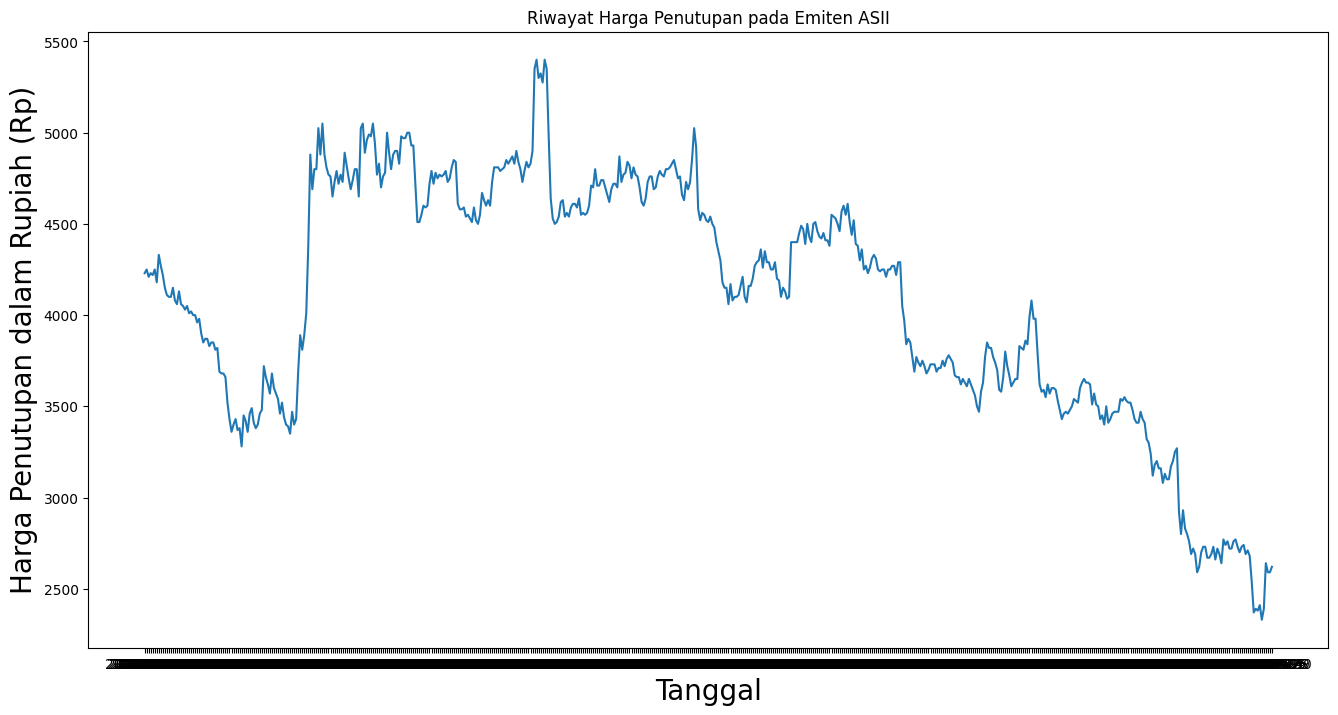

In [ ]:
df_asii = data_clean(asii_data)
view_data(df_asii, 'asii'.upper())

In [ ]:
df_asii.head()

,stock_code,prev,open,high,low,close,change
date,,,,,,,
2022-01-03,UNVR,4110,4120,4340,4120,4230,120
2022-01-04,UNVR,4230,4250,4310,4230,4250,20
2022-01-05,UNVR,4250,4260,4270,4180,4210,-40
2022-01-06,UNVR,4210,4210,4240,4180,4230,20
2022-01-07,UNVR,4230,4230,4240,4200,4220,-10


In [ ]:
y = df_asii['close'].fillna(method='ffill')
y = y.values.reshape(-1, 1)

# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)

1/1 [==============================] - 1s 977ms/step
        date  actual  forecast
0 2022-01-03    4230       NaN
1 2022-01-04    4250       NaN
2 2022-01-05    4210       NaN
3 2022-01-06    4230       NaN
4 2022-01-07    4220       NaN
          date  actual  forecast
554 2024-04-24    2390       NaN
555 2024-04-25    2640       NaN
556 2024-04-26    2590       NaN
557 2024-04-29    2590       NaN
558 2024-04-30    2620    2620.0
        date  actual     forecast
0 2024-05-01     NaN  2811.886230
1 2024-05-02     NaN  2994.036621
2 2024-05-03     NaN  3488.867676
3 2024-05-04     NaN  3193.890137
4 2024-05-05     NaN  3523.319824
         date  actual     forecast
25 2024-05-26     NaN  4341.463379
26 2024-05-27     NaN  4048.023926
27 2024-05-28     NaN  4397.441406
28 2024-05-29     NaN  4261.797363
29 2024-05-30     NaN  3992.858154


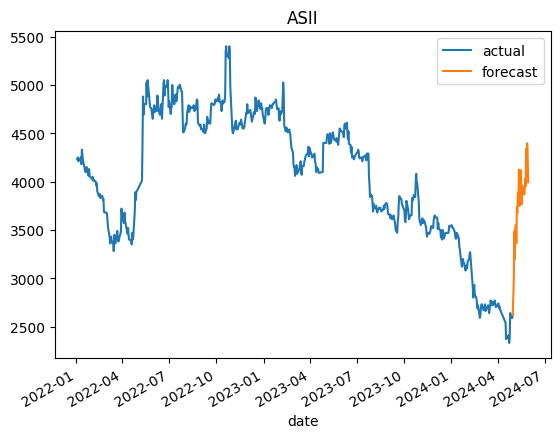

In [ ]:
lookback_forecast(60, 30, y, df_asii, 'ASII')

In [ ]:
df_yf_asii = yf.download(tickers=['ASII'], period='1y')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df_yf_asii.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-05,0.0003,0.0003,0.0003,0.0003,0.0003,100052
2023-06-06,0.0003,0.0003,0.0003,0.0003,0.0003,0
2023-06-07,0.0002,0.0003,0.0002,0.0003,0.0003,1007571
2023-06-08,0.0002,0.0003,0.0002,0.0003,0.0003,5502962
2023-06-09,0.0003,0.0003,0.0002,0.0002,0.0002,236100


1/1 [==============================] - 1s 1s/step
        date  actual  forecast
0 2022-01-03    4230       NaN
1 2022-01-04    4250       NaN
2 2022-01-05    4210       NaN
3 2022-01-06    4230       NaN
4 2022-01-07    4220       NaN
          date  actual  forecast
554 2024-04-24    2390       NaN
555 2024-04-25    2640       NaN
556 2024-04-26    2590       NaN
557 2024-04-29    2590       NaN
558 2024-04-30    2620    2620.0
        date  actual     forecast
0 2024-05-01     NaN  3030.259766
1 2024-05-02     NaN  2925.724121
2 2024-05-03     NaN  3246.958984
3 2024-05-04     NaN  2910.089111
4 2024-05-05     NaN  3186.467529
         date  actual     forecast
25 2024-05-26     NaN  2943.771240
26 2024-05-27     NaN  2889.132324
27 2024-05-28     NaN  2826.041016
28 2024-05-29     NaN  3127.532715
29 2024-05-30     NaN  2934.373535


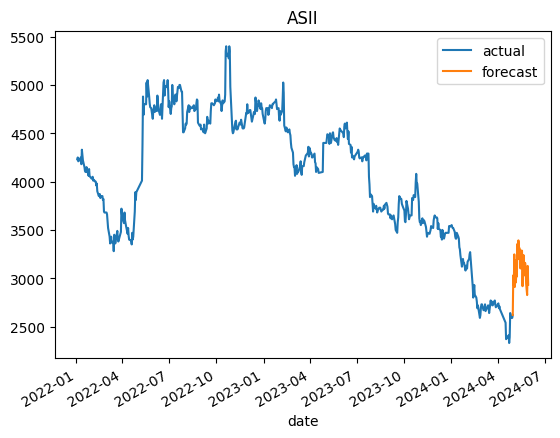

In [ ]:
lookback_forecast(60, 30, y, df_asii, 'ASII')

1/1 [==============================] - 1s 854ms/step
        date  actual  forecast
0 2022-01-03    4230       NaN
1 2022-01-04    4250       NaN
2 2022-01-05    4210       NaN
3 2022-01-06    4230       NaN
4 2022-01-07    4220       NaN
          date  actual  forecast
554 2024-04-24    2390       NaN
555 2024-04-25    2640       NaN
556 2024-04-26    2590       NaN
557 2024-04-29    2590       NaN
558 2024-04-30    2620    2620.0
        date  actual     forecast
0 2024-05-01     NaN  3527.726318
1 2024-05-02     NaN  3474.645996
2 2024-05-03     NaN  3550.799805
3 2024-05-04     NaN  3555.892822
4 2024-05-05     NaN  3573.550049
         date  actual     forecast
85 2024-07-25     NaN  4393.520996
86 2024-07-26     NaN  4458.369629
87 2024-07-27     NaN  4359.976074
88 2024-07-28     NaN  4290.576172
89 2024-07-29     NaN  4446.503418


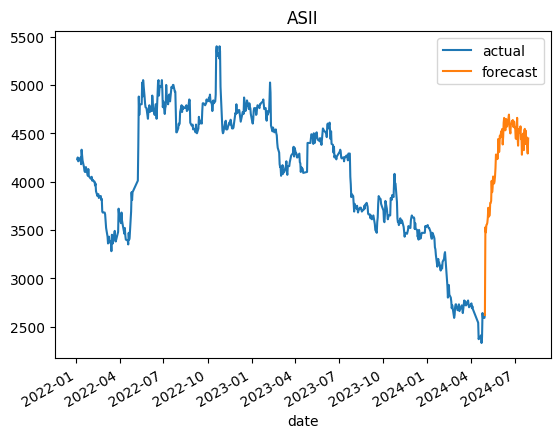

In [ ]:
lookback_forecast(30, 90, y, df_asii, 'ASII')

# Buat Model Forecast

# ASII

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 810ms/step
        date  actual  forecast
0 2022-01-03    4230       NaN
1 2022-01-04    4250       NaN
2 2022-01-05    4210       NaN
3 2022-01-06    4230       NaN
4 2022-01-07    4220       NaN
          date  actual  forecast
554 2024-04-24    2390       NaN
555 2024-04-25    2640       NaN
556 2024-04-26    2590       NaN
557 2024-04-29    2590       NaN
558 2024-04-30    2620    2620.0
        date  actual     forecast
0 2024-05-01     NaN  2523.225098
1 2024-05-02     NaN  2481.218750
2 2024-05-03     NaN  2491.639648
3 2024-05-04     NaN  2541.249756
4 2024-05-05     NaN  2463.023926
        date  actual     forecast
2 2024-05-03     NaN  2491.639648
3 2024-05-04     NaN  2541.249756
4 2024-05-05     NaN  2463.023926
5 2024-05-06     NaN  2528.844971
6 2024-05-07     NaN  2448.099121


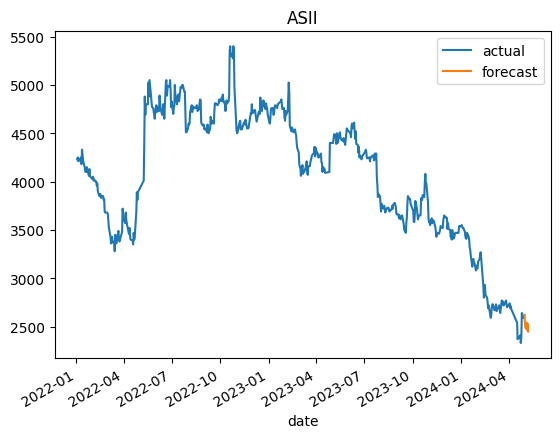

In [ ]:
lookback_forecast(30, 7, y, df_asii, 'ASII')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 849ms/step
        date  actual  forecast
0 2022-01-03    4230       NaN
1 2022-01-04    4250       NaN
2 2022-01-05    4210       NaN
3 2022-01-06    4230       NaN
4 2022-01-07    4220       NaN
          date  actual  forecast
554 2024-04-24    2390       NaN
555 2024-04-25    2640       NaN
556 2024-04-26    2590       NaN
557 2024-04-29    2590       NaN
558 2024-04-30    2620    2620.0
        date  actual     forecast
0 2024-05-01     NaN  2545.624756
1 2024-05-02     NaN  2554.376709
2 2024-05-03     NaN  2533.989990
3 2024-05-04     NaN  2537.267822
4 2024-05-05     NaN  2456.981689
         date  actual     forecast
9  2024-05-10     NaN  2381.989746
10 2024-05-11     NaN  2480.846436
11 2024-05-12     NaN  2367.457764
12 2024-05-13     NaN  2400.633057
13 2024-05-14     NaN  2403.027344


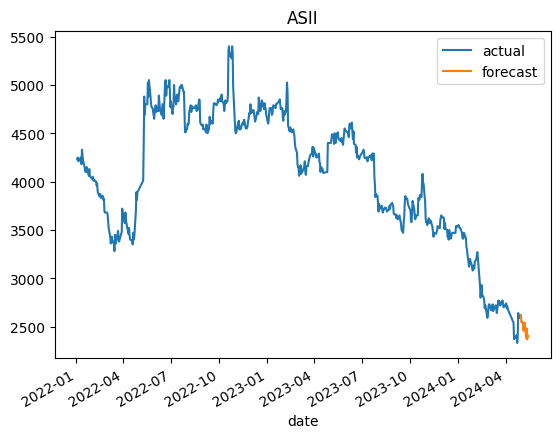

In [ ]:
lookback_forecast(30, 14, y, df_asii, 'ASII')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 811ms/step
        date  actual  forecast
0 2022-01-03    4230       NaN
1 2022-01-04    4250       NaN
2 2022-01-05    4210       NaN
3 2022-01-06    4230       NaN
4 2022-01-07    4220       NaN
          date  actual  forecast
554 2024-04-24    2390       NaN
555 2024-04-25    2640       NaN
556 2024-04-26    2590       NaN
557 2024-04-29    2590       NaN
558 2024-04-30    2620    2620.0
        date  actual     forecast
0 2024-05-01     NaN  2327.191895
1 2024-05-02     NaN  2495.800537
2 2024-05-03     NaN  2529.600098
3 2024-05-04     NaN  2208.646973
4 2024-05-05     NaN  2430.106445
         date  actual     forecast
25 2024-05-26     NaN  2185.578613
26 2024-05-27     NaN  2315.168213
27 2024-05-28     NaN  2305.217041
28 2024-05-29     NaN  2398.163574
29 2024-05-30     NaN  2388.498047


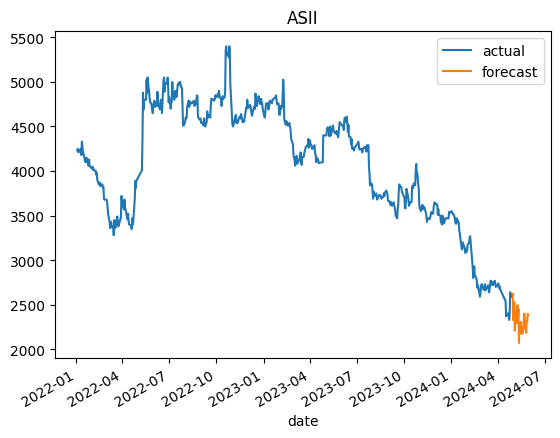

In [ ]:
lookback_forecast(30, 30, y, df_asii, 'ASII')

In [ ]:
lookback_forecast(30, 90, y, df_asii, 'ASII')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 857ms/step
        date  actual  forecast
0 2022-01-03    4230       NaN
1 2022-01-04    4250       NaN
2 2022-01-05    4210       NaN
3 2022-01-06    4230       NaN
4 2022-01-07    4220       NaN
          date  actual  forecast
554 2024-04-24    2390       NaN
555 2024-04-25    2640       NaN
556 2024-04-26    2590       NaN
557 2024-04-29    2590       NaN
558 2024-04-30    2620    2620.0
        date  actual     forecast
0 2024-05-01     NaN  2997.965088
1 2024-05-02     NaN  3035.669922
2 2024-05-03     NaN  3097.958008
3 2024-05-04     NaN  3071.262207
4 2024-05-05     NaN  3282.641846
          date  actual     forecast
175 2024-10-23     NaN  4957.944336
176 2024-10-24     NaN  4950.522461
177 2024-10-25     NaN  4960.695801
178 2024-10-26     NaN  4921.082031
179 2024-10-27     NaN  4920.571289


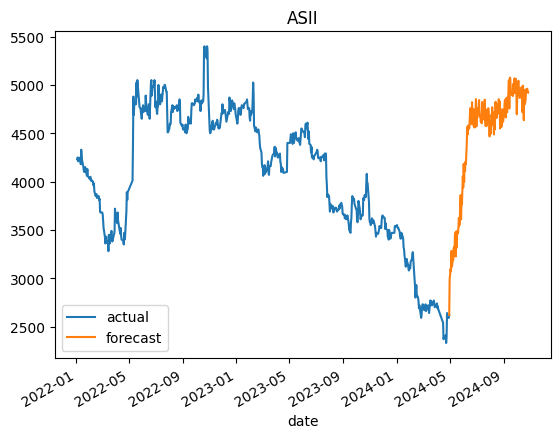

In [ ]:
lookback_forecast(30, 180, y, df_asii, 'ASII')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 804ms/step
        date  actual  forecast
0 2022-01-03    4230       NaN
1 2022-01-04    4250       NaN
2 2022-01-05    4210       NaN
3 2022-01-06    4230       NaN
4 2022-01-07    4220       NaN
          date  actual  forecast
554 2024-04-24    2390       NaN
555 2024-04-25    2640       NaN
556 2024-04-26    2590       NaN
557 2024-04-29    2590       NaN
558 2024-04-30    2620    2620.0
        date  actual     forecast
0 2024-05-01     NaN  4352.856934
1 2024-05-02     NaN  4307.026855
2 2024-05-03     NaN  4471.154297
3 2024-05-04     NaN  4247.315430
4 2024-05-05     NaN  4375.397461
          date  actual     forecast
360 2025-04-26     NaN  3516.252686
361 2025-04-27     NaN  3506.753418
362 2025-04-28     NaN  3372.589355
363 2025-04-29     NaN  3466.237061
364 2025-04-30     NaN  3424.513184


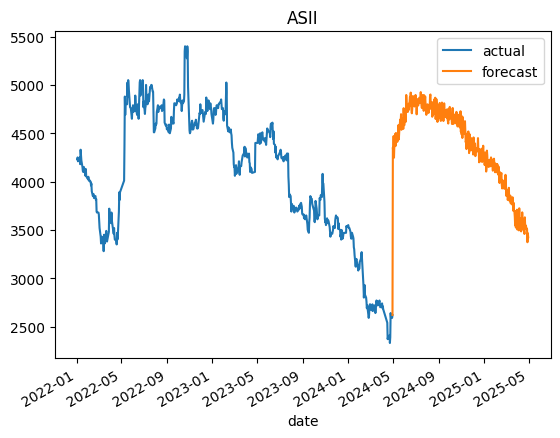

In [ ]:
lookback_forecast(30, 365, y, df_asii, 'ASII')